In [ ]:
from matplotlib import pyplot
import matplotlib as plt
import pandas as pd
import numpy as np

In [ ]:
#Membaca Data
data = pd.read_csv('databelanda.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
#Hasil 5 teratas
print(data.head())

                       load
datetime                   
2015-01-01 00:15:00  9524.0
2015-01-01 00:30:00  9407.0
2015-01-01 00:45:00  9271.0
2015-01-01 01:00:00  9148.0
2015-01-01 01:15:00  9025.0


In [ ]:
# Create Training and Test
insample = data[:189887]
outsample = data[189887:]

In [ ]:
df = insample

Text(0, 0.5, 'Electric Load (MW)')

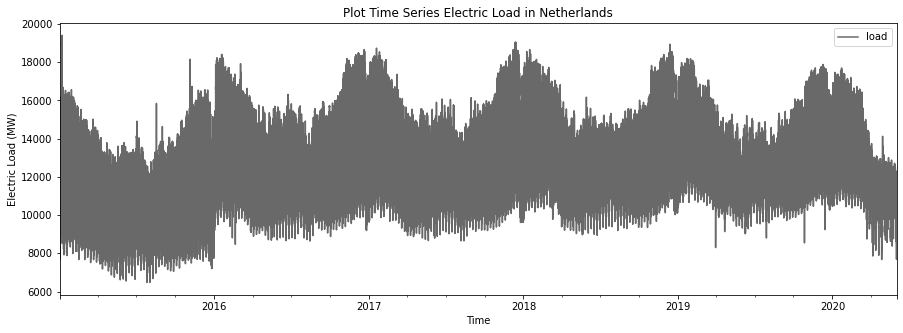

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ax = df.plot(color='dimgrey',figsize=(15,5),title='Plot Time Series Electric Load in Netherlands');
ax.set_xlabel("Time")
ax.set_ylabel("Electric Load (MW)")

In [ ]:
import pandas as pd
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['date']).day_name()
dfa = pd.DataFrame(df, columns=['date', 'time', 'load'])
dfa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,time,load
0,Thursday,00:15:00,9524.00
1,Thursday,00:30:00,9407.00
2,Thursday,00:45:00,9271.00
3,Thursday,01:00:00,9148.00
4,Thursday,01:15:00,9025.00
...,...,...,...
189882,Sunday,22:45:00,10203.34
189883,Sunday,23:00:00,10025.63
189884,Sunday,23:15:00,9918.59
189885,Sunday,23:30:00,9853.37


In [ ]:
dfb = dfa.groupby(['time','date'])['load'].mean().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
dfb

,time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,00:00:00,10476.108304,9826.270496,10274.339329,9826.842367,10446.418262,10371.776631,10431.780213
1,00:15:00,10402.732968,9785.828121,10192.570424,9752.067314,10375.325936,10310.044610,10363.169574
2,00:30:00,10331.444770,9730.831206,10106.727138,9666.230071,10302.723604,10240.790284,10292.105603
3,00:45:00,10268.232191,9689.904184,10026.517314,9584.060318,10240.987208,10183.020532,10233.311099
4,01:00:00,10231.970565,9679.655922,9965.503004,9547.410636,10202.788799,10150.569184,10201.067872
...,...,...,...,...,...,...,...,...
91,22:45:00,11004.941979,11000.160745,10418.367562,10290.173640,11145.452650,11085.453972,11112.848369
92,23:00:00,10816.938304,10828.981738,10286.362792,10156.436219,10969.214770,10902.216702,10928.831738
93,23:15:00,10675.337385,10697.800461,10167.970919,10066.617385,10832.900283,10766.994184,10793.891028
94,23:30:00,10535.366113,10573.730213,10046.423569,9972.637809,10696.782615,10638.121135,10659.971631


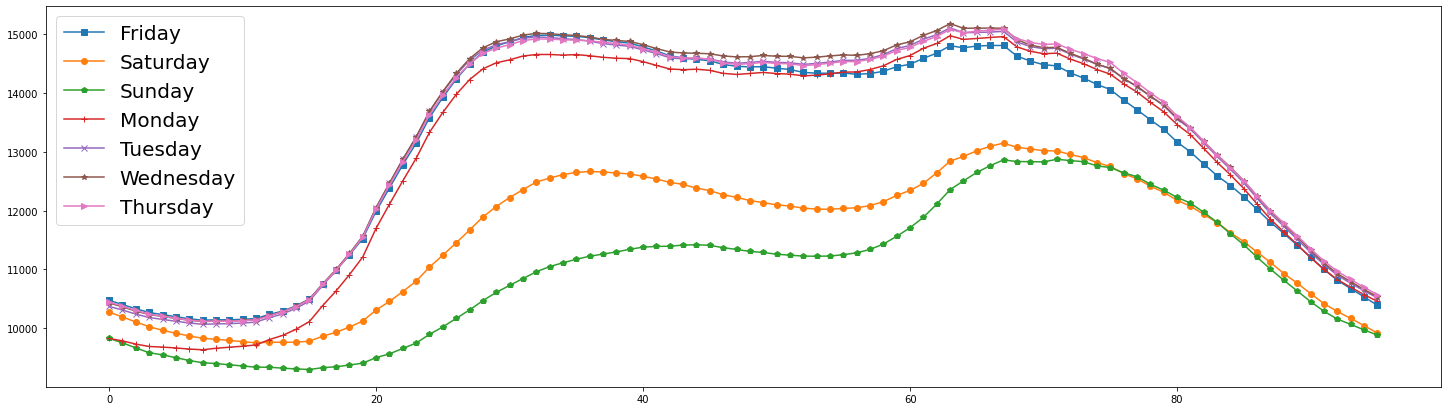

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (25,7)

plt.plot(dfb['Friday'],  '-s', label='Friday')
plt.plot(dfb['Saturday'],  '-o', label='Saturday')
plt.plot(dfb['Sunday'],  '-p', label='Sunday')
plt.plot(dfb['Monday'],  '-+', label='Monday')
plt.plot(dfb['Tuesday'],  '-x', label='Tuesday')
plt.plot(dfb['Wednesday'],  '-*', label='Wednesday')
plt.plot(dfb['Thursday'],  '->', label='Thursday')
plt.legend(fontsize=20,ncol=1)
plt.show()

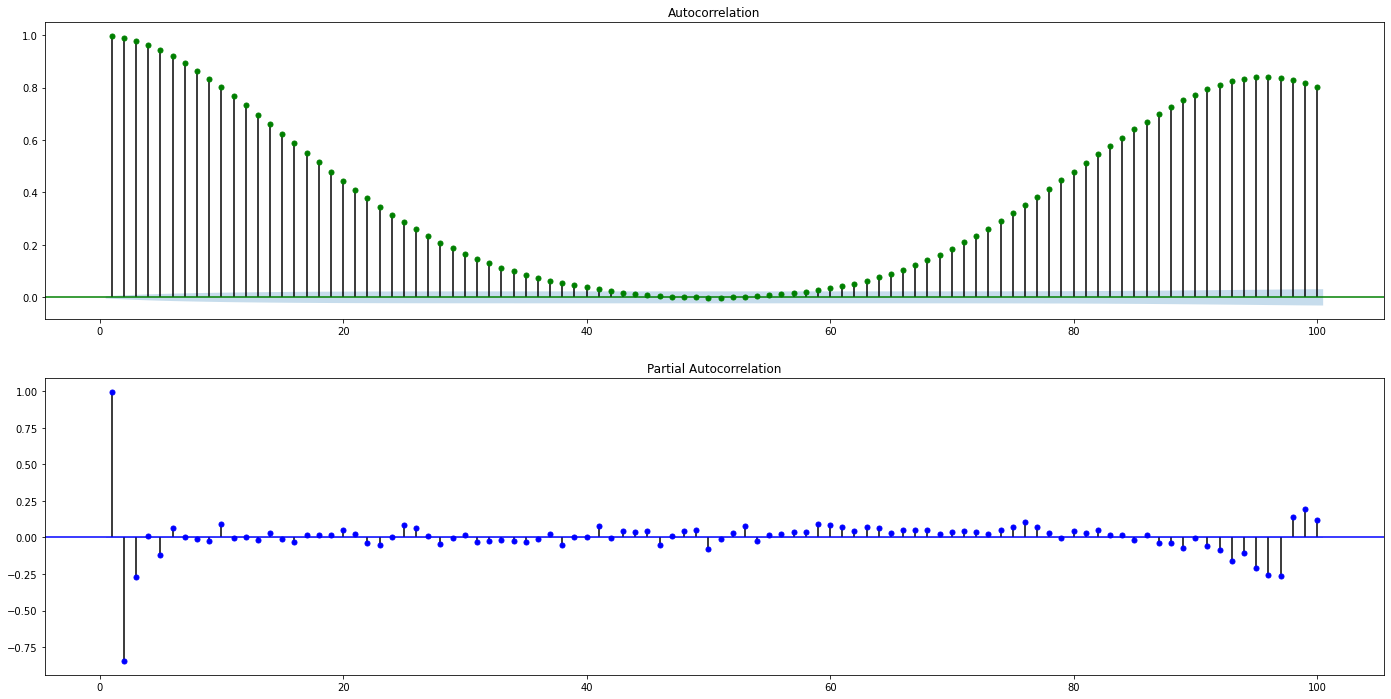

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (35, 5)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12))

# Plot the ACF of data
acf=plot_acf(data['load'], lags=100, zero=False, ax=ax1, color='green');


# Plot the PACF of data
pacf=plot_pacf(data['load'], lags=100, zero=False, ax=ax2, color='blue');

In [ ]:
df['regular'] = df['load'].diff()
df['daily'] = df['load'].diff(periods=96)
df['weekly'] = df['load'].diff(periods=672)
df['yearly1'] = df['load'].diff(periods=34944)
df['yearly2'] = df['load'].diff(periods=35616)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,time,load,regular,daily,weekly,yearly1,yearly2
0,Thursday,00:15:00,9524.00,NaN,NaN,NaN,NaN,NaN
1,Thursday,00:30:00,9407.00,-117.00,NaN,NaN,NaN,NaN
2,Thursday,00:45:00,9271.00,-136.00,NaN,NaN,NaN,NaN
3,Thursday,01:00:00,9148.00,-123.00,NaN,NaN,NaN,NaN
4,Thursday,01:15:00,9025.00,-123.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
189882,Sunday,22:45:00,10203.34,-118.87,-46.35,-33.42,-571.54,-347.93
189883,Sunday,23:00:00,10025.63,-177.71,-111.32,-115.65,-560.04,-394.75
189884,Sunday,23:15:00,9918.59,-107.04,-75.80,-161.75,-602.93,-437.36
189885,Sunday,23:30:00,9853.37,-65.22,-45.98,-139.13,-586.40,-427.54


In [ ]:
df1=pd.DataFrame(df['regular']).dropna()
df2=pd.DataFrame(df['daily']).dropna()
df3=pd.DataFrame(df['weekly']).dropna()
df4=pd.DataFrame(df['yearly1']).dropna()
df5=pd.DataFrame(df['yearly2']).dropna()

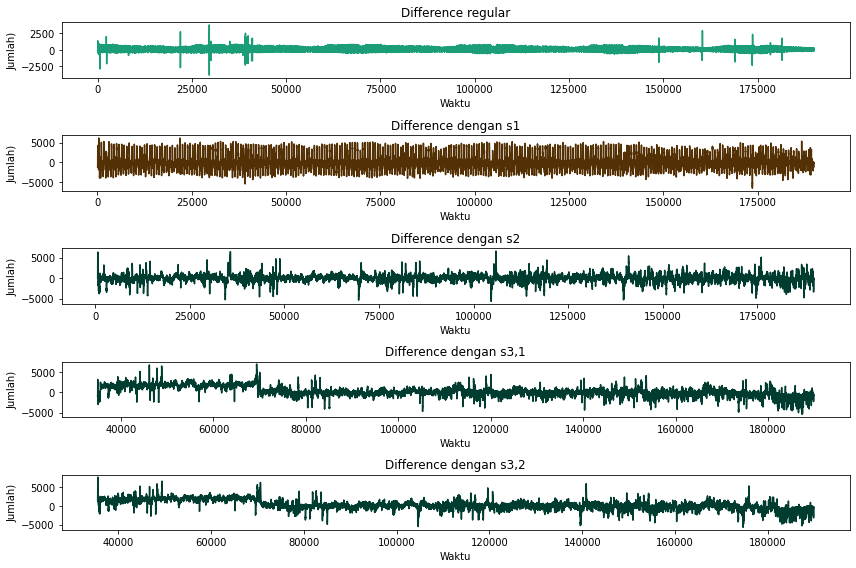

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12,18))
axa = df['regular'].plot(colormap='Dark2',figsize=(12,8),title='Difference regular', ax=ax1);
axa.set_xlabel("Waktu")
axa.set_ylabel("Jumlah)")
axx = df['daily'].plot(colormap='BrBG',figsize=(12,8),title='Difference dengan s1', ax=ax2);
axx.set_xlabel("Waktu")
axx.set_ylabel("Jumlah)")
axy = df['weekly'].plot(colormap='BrBG_r',figsize=(12,8),title='Difference dengan s2', ax=ax3);
axy.set_xlabel("Waktu")
axy.set_ylabel("Jumlah)")
axz = df['yearly1'].plot(colormap='BrBG_r',figsize=(12,8),title='Difference dengan s3,1', ax=ax4);
axz.set_xlabel("Waktu")
axz.set_ylabel("Jumlah)")
axb = df['yearly2'].plot(colormap='BrBG_r',figsize=(12,8),title='Difference dengan s3,2', ax=ax5);
axb.set_xlabel("Waktu")
axb.set_ylabel("Jumlah)")
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


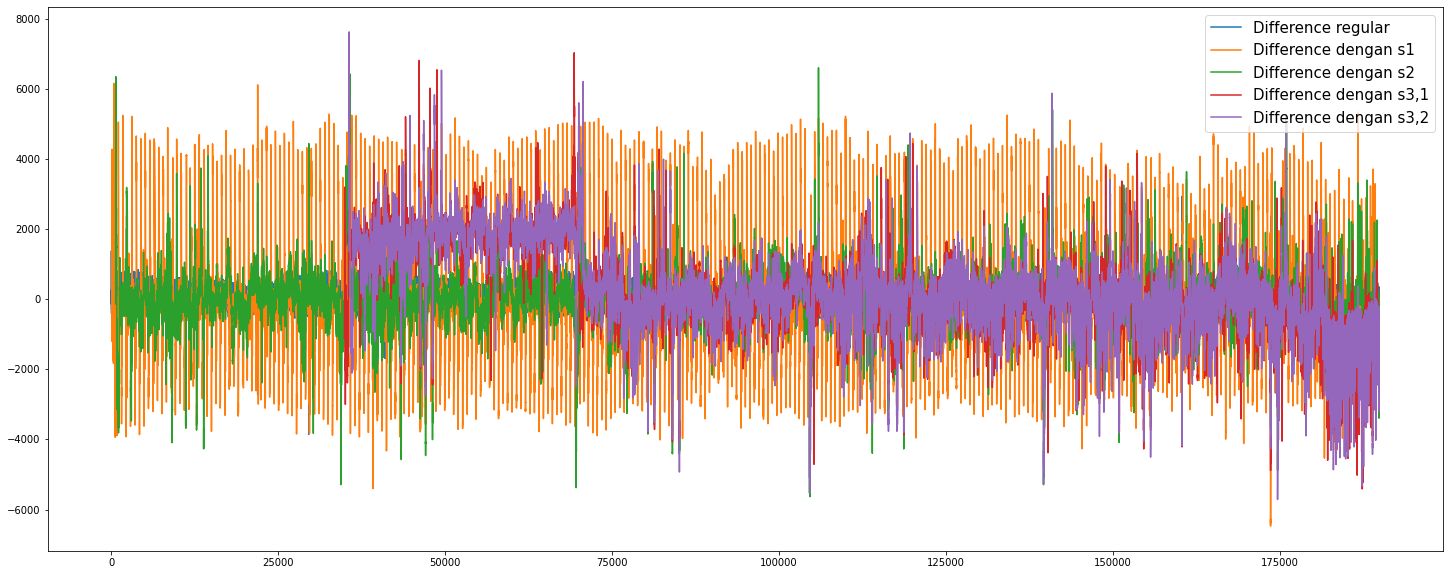

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (25,10)

plt.plot(df['regular'], label='Difference regular')
plt.plot(df['daily'], label='Difference dengan s1')
plt.plot(df['weekly'], label='Difference dengan s2')
plt.plot(df['yearly1'], label='Difference dengan s3,1')
plt.plot(df['yearly2'], label='Difference dengan s3,2')
plt.legend(fontsize=15,ncol=1)
plt.show()

In [ ]:
s=df1.describe()
s1=df2.describe()
s2=df3.describe()
s3=df4.describe()
s4=df5.describe()
print(s,s1,s2,s3,s4)

             regular
count  189886.000000
mean        0.001172
std       174.750050
min     -3853.990000
25%      -104.000000
50%       -16.000000
75%        72.000000
max      3795.080000                daily
count  189791.000000
mean       -0.483376
std      1297.592830
min     -6473.200000
25%      -488.000000
50%       -35.000000
75%       294.000000
max      6152.030000               weekly
count  189215.000000
mean       -8.384535
std       769.423709
min     -5636.000000
25%      -297.000000
50%         7.000000
75%       295.000000
max      6599.000000              yearly1
count  154943.000000
mean      333.648441
std      1138.045716
min     -5408.570000
25%      -271.720000
50%       172.000000
75%       948.020000
max      7027.000000              yearly2
count  154271.000000
mean      329.331272
std      1187.144653
min     -5712.180000
25%      -294.845000
50%       215.950000
75%       956.000000
max      7622.000000


In [ ]:
mu1, sigma1 = 0.001172, 174.750050
mu2, sigma2 = -0.483376, 1297.592830
mu3, sigma3 = -8.384535, 769.423709
mu4, sigma4 = 333.648441, 1138.045716
mu5, sigma5 = 329.331272, 1187.144653

In [ ]:
m1a=abs(mu1 - np.mean(df['regular']))
m1b=abs(sigma1 - np.std(df['regular'], ddof=1))
m2a=abs(mu2 - np.mean(df['daily']))
m2b=abs(sigma2 - np.std(df['daily'], ddof=1))
m3a=abs(mu3 - np.mean(df['weekly']))
m3b=abs(sigma3 - np.std(df['weekly'], ddof=1))
m4a=abs(mu4 - np.mean(df['yearly1']))
m4b=abs(sigma4 - np.std(df['yearly1'], ddof=1))
m5a=abs(mu5 - np.mean(df['yearly1']))
m5b=abs(sigma5 - np.std(df['yearly1'], ddof=1))

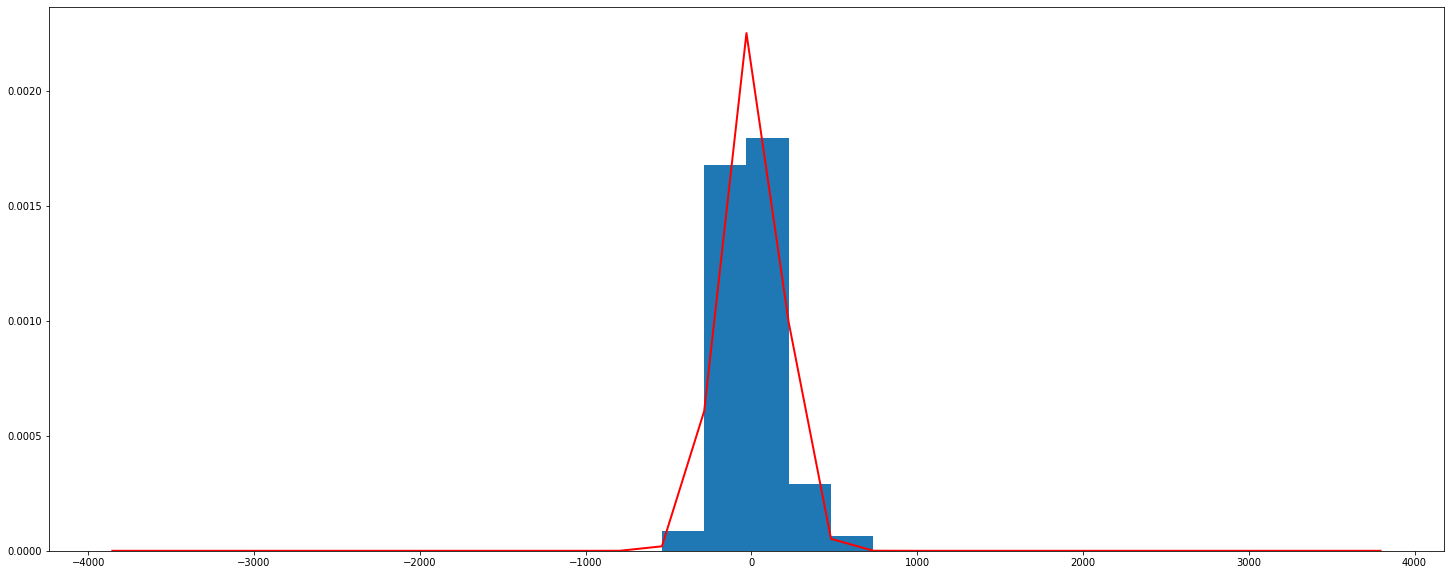

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(df['regular'], 30, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r')
plt.show()

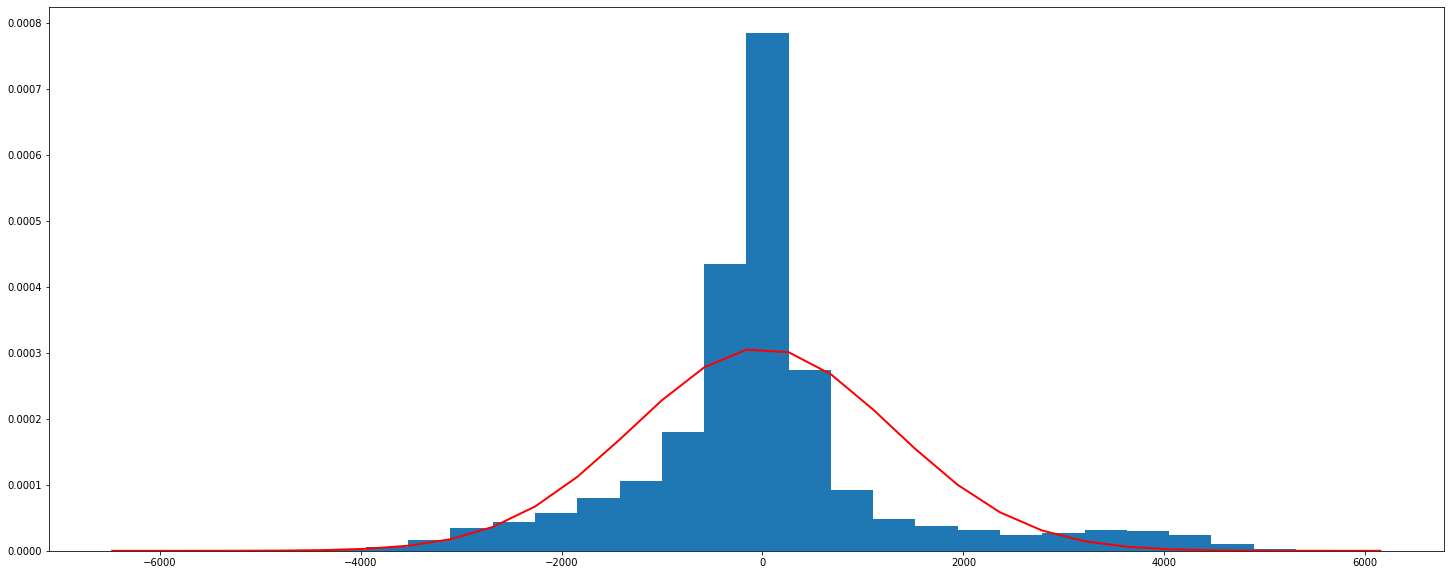

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(df['daily'], 30, density=True)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='r')
plt.show()

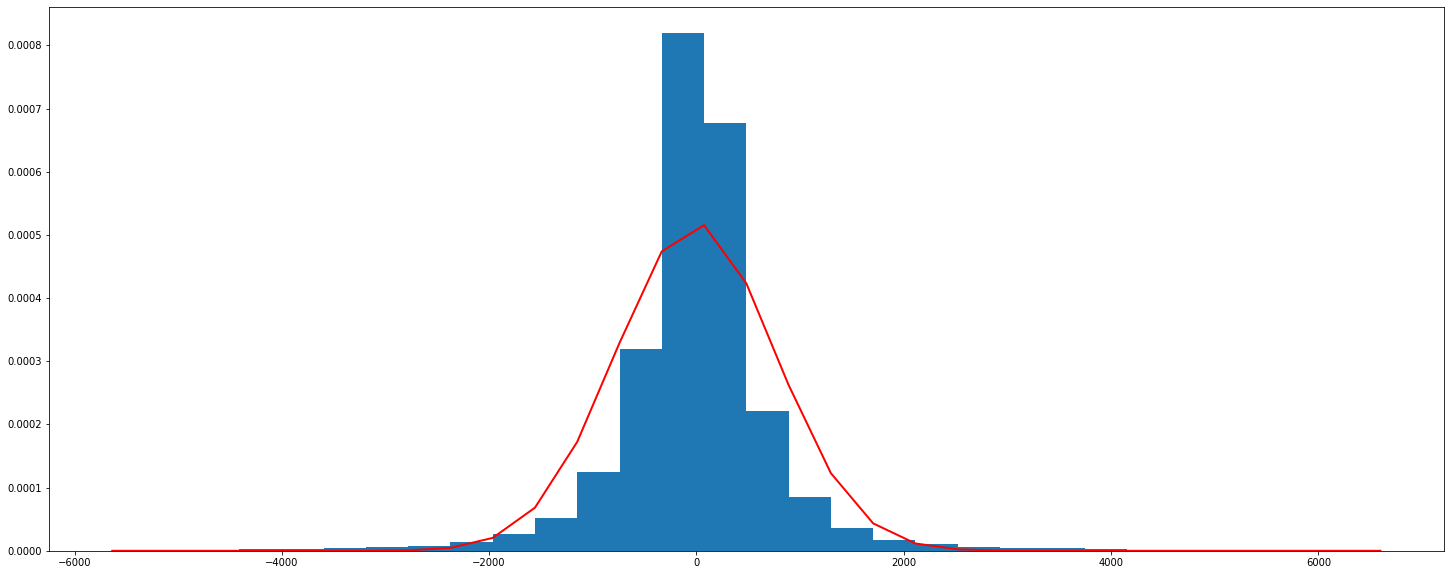

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(df['weekly'], 30, density=True)
plt.plot(bins, 1/(sigma3 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu3)**2 / (2 * sigma3**2) ),
         linewidth=2, color='r')
plt.show()

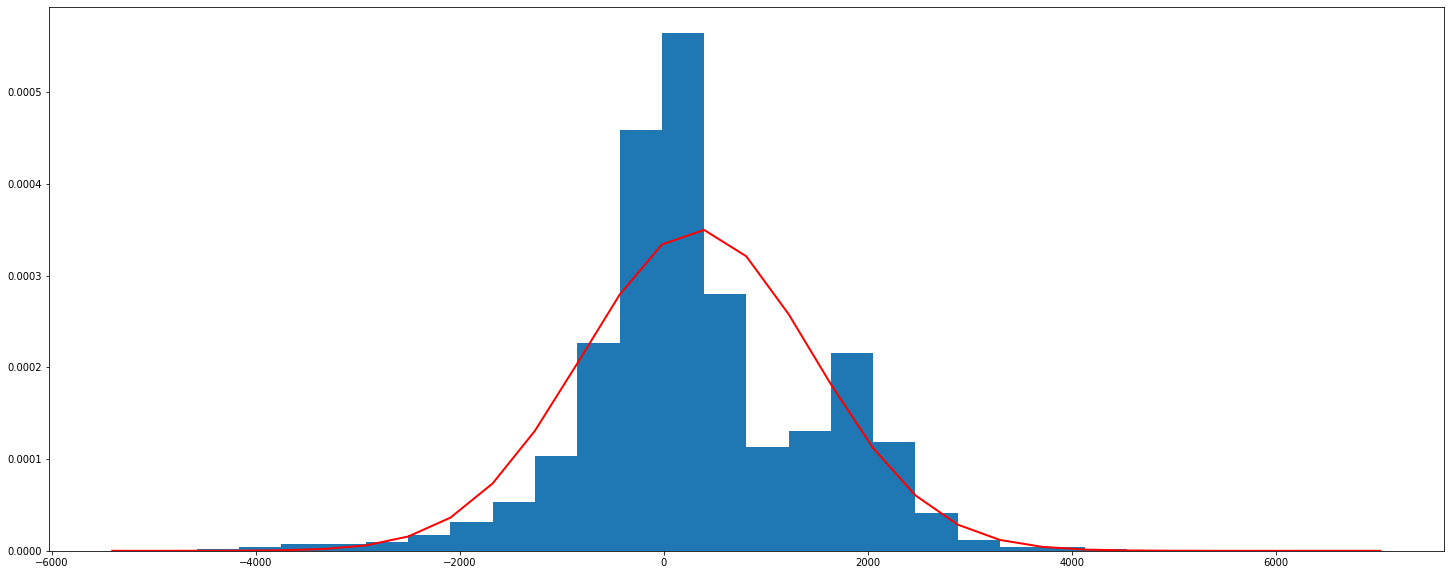

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(df['yearly1'], 30, density=True)
plt.plot(bins, 1/(sigma4 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu4)**2 / (2 * sigma4**2) ),
         linewidth=2, color='r')
plt.show()

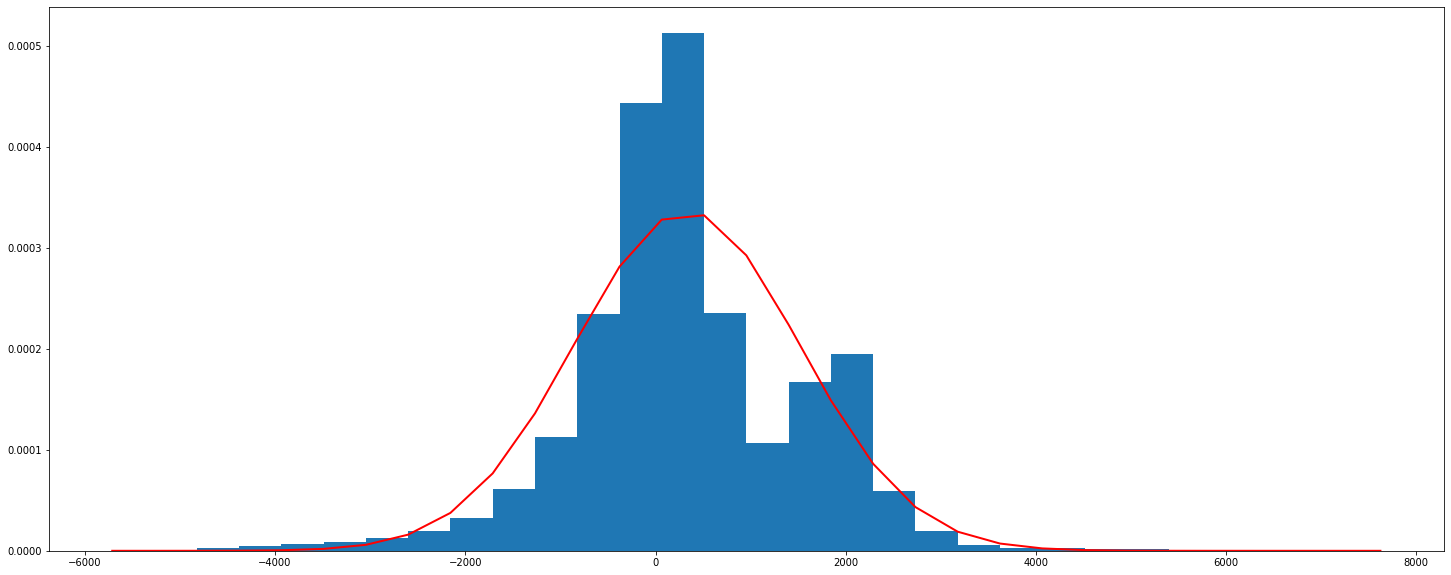

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(df['yearly2'], 30, density=True)
plt.plot(bins, 1/(sigma5 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu5)**2 / (2 * sigma5**2) ),
         linewidth=2, color='r')
plt.show()

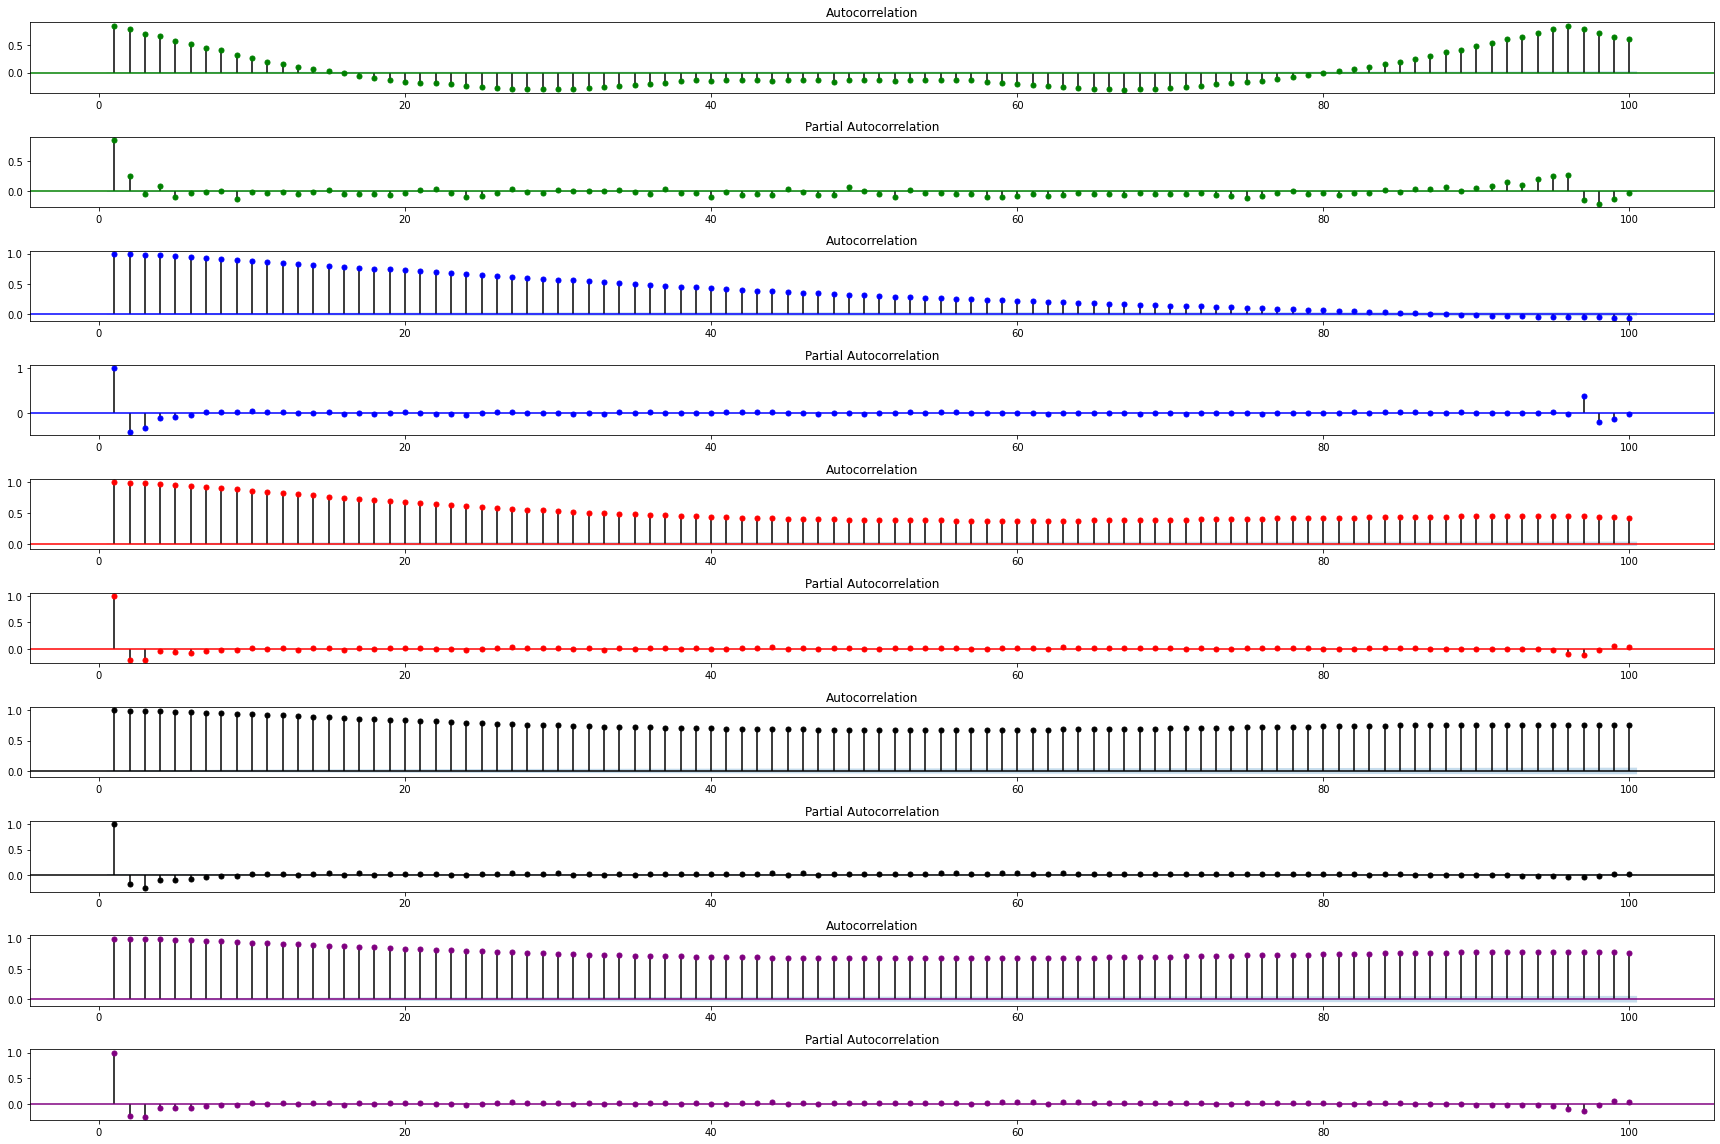

In [ ]:
plt.rcParams['figure.figsize'] = (35, 5)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(24,16))

# Plot the ACF of regular
acf1=plot_acf(df1, lags=100, zero=False, ax=ax1, color='green');


# Plot the PACF of regular
pacf1=plot_pacf(df1, lags=100, zero=False, ax=ax2, color='green');


# Plot the ACF of daily
acf2=plot_acf(df2, lags=100, zero=False, ax=ax3, color='blue');


# Plot the PACF of daily
pacf2=plot_pacf(df2, lags=100, zero=False, ax=ax4, color='blue');


# Plot the ACF of weekly
acf3=plot_acf(df3, lags=100, zero=False, ax=ax5, color='red');


# Plot the PACF of weekly
pacf3=plot_pacf(df3, lags=100, zero=False, ax=ax6, color='red');


# Plot the ACF of yearly1
acf4=plot_acf(df4, lags=100, zero=False, ax=ax7, color='black');


# Plot the PACF of yearly1
pacf4=plot_pacf(df4, lags=100, zero=False, ax=ax8, color='black');


# Plot the ACF of yearly2
acf5=plot_acf(df5, lags=100, zero=False, ax=ax9, color='purple');


# Plot the PACF of yearly2
pacf5=plot_pacf(df5, lags=100, zero=False, ax=ax10, color='purple');


fig.tight_layout()

In [ ]:
residual = pd.read_csv('residual.txt', sep=';', header=0, low_memory=False)
residual.to_csv('residuals.csv')
residuals = pd.read_csv('residuals.csv')
residuals = pd.DataFrame(residuals)
mape = residuals.drop(columns=['Unnamed: 0'])
mape

,date,time,load,load_w,load_dw,load_wq,load_dwq
0,2020/06/01,00:00:00,9691.12,9687.7649,9703.9398,9691.4327,9703.4935
1,2020/06/01,00:15:00,9608.30,9665.2425,9678.3703,9668.7246,9663.4253
2,2020/06/01,00:30:00,9567.20,9636.6686,9634.7611,9640.4335,9612.8510
3,2020/06/01,00:45:00,9545.56,9614.5564,9624.2127,9616.7861,9590.5594
4,2020/06/01,01:00:00,9542.75,9613.1206,9617.6992,9619.7309,9588.1154
...,...,...,...,...,...,...,...
11706,2020/09/30,22:30:00,12453.81,9608.7653,8048.9732,9338.5507,5657.3634
11707,2020/09/30,22:45:00,12324.95,9449.7723,7890.2660,9180.2555,5504.9964
11708,2020/09/30,23:00:00,12218.53,9313.2060,7733.2367,9046.4692,5306.9073
11709,2020/09/30,23:15:00,12076.92,9213.9140,7617.3397,8947.0226,5184.1381


In [ ]:
mape1 = mape.groupby('time',  as_index=False)['load','load_w','load_dw','load_wq','load_dwq'].mean()
mape1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,time,load,load_w,load_dw,load_wq,load_dwq
0,00:00:00,10872.261639,9412.084619,8698.463917,9287.645139,7671.135991
1,00:15:00,10822.937049,9364.550566,8651.071370,9241.365961,7615.998133
2,00:30:00,10775.560984,9316.292858,8593.434543,9195.922197,7556.997203
3,00:45:00,10748.786230,9284.209407,8566.353337,9167.359514,7536.771579
4,01:00:00,10709.404344,9263.018543,8538.836671,9148.849249,7508.533616
...,...,...,...,...,...,...
91,22:45:00,11384.473279,9880.109557,9179.297299,9730.572269,8139.638273
92,23:00:00,11254.108852,9747.774002,9034.732777,9605.771057,7979.110436
93,23:15:00,11143.539836,9648.088049,8925.001265,9508.171498,7864.391845
94,23:30:00,11040.760492,9544.867412,8819.164380,9408.726344,7760.973793


In [ ]:
res1 = abs(((mape1['load'] - mape1['load_w'])/(mape1['load']))* 100).round(2).astype(str) + '%'
re1 = pd.DataFrame(res1, columns=['intraday'])
res2 = abs(((mape1['load'] - mape1['load_dw'])/(mape1['load']))* 100).round(2).astype(str) + '%'
re2 = pd.DataFrame(res2, columns=['intraday and intraweek'])
res3 = abs(((mape1['load'] - mape1['load_wq'])/(mape1['load']))* 100).round(2).astype(str) + '%'
re3 = pd.DataFrame(res3, columns=['intraweek and intramonth'])
res4 = abs(((mape1['load'] - mape1['load_dwq'])/(mape1['load']))* 100).round(2).astype(str) + '%'
re4 = pd.DataFrame(res4, columns=['intraday, intraweek and intramonth'])
######
ress1 = abs(((mape1['load'] - mape1['load_w'])/(mape1['load']))* 100)
ree1 = pd.DataFrame(ress1, columns=['intraday'])
ress2 = abs(((mape1['load'] - mape1['load_dw'])/(mape1['load']))* 100)
ree2 = pd.DataFrame(ress2, columns=['intraday and intraweek'])
ress3 = abs(((mape1['load'] - mape1['load_wq'])/(mape1['load']))* 100)
ree3 = pd.DataFrame(ress3, columns=['intraweek and intramonth'])
ress4 = abs(((mape1['load'] - mape1['load_dwq'])/(mape1['load']))* 100)
ree4 = pd.DataFrame(ress4, columns=['intraday, intraweek and intramonth'])

In [ ]:
residuals = pd.concat([mape1['time'], re1, re2, re3, re4], axis=1)
residuals1 = pd.concat([mape1['time'], ree1, ree2, ree3, ree4], axis=1)
residuals

,time,intraday,intraday and intraweek,intraweek and intramonth,"intraday, intraweek and intramonth"
0,00:00:00,13.43%,19.99%,14.57%,29.44%
1,00:15:00,13.47%,20.07%,14.61%,29.63%
2,00:30:00,13.54%,20.25%,14.66%,29.87%
3,00:45:00,13.63%,20.3%,14.71%,29.88%
4,01:00:00,13.51%,20.27%,14.57%,29.89%
...,...,...,...,...,...
91,22:45:00,13.21%,19.37%,14.53%,28.5%
92,23:00:00,13.38%,19.72%,14.65%,29.1%
93,23:15:00,13.42%,19.91%,14.68%,29.43%
94,23:30:00,13.55%,20.12%,14.78%,29.71%


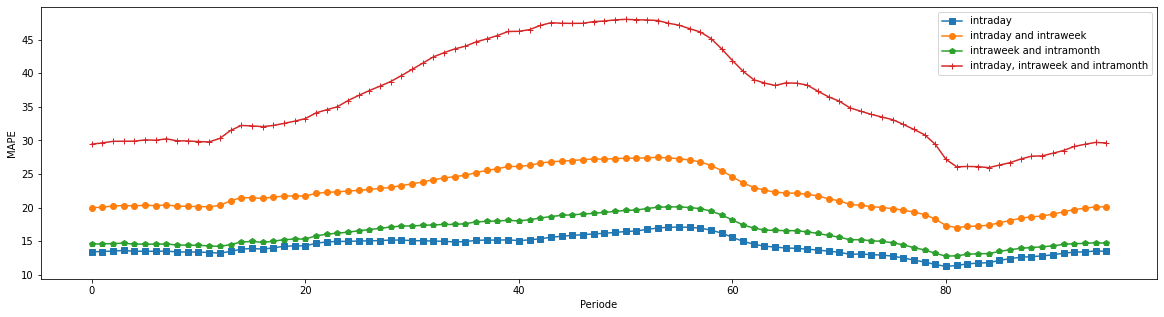

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,5)

plt.plot(residuals1['intraday'],  '-s', label='intraday')
plt.plot(residuals1['intraday and intraweek'],  '-o', label='intraday and intraweek')
plt.plot(residuals1['intraweek and intramonth'],  '-p', label='intraweek and intramonth')
plt.plot(residuals1['intraday, intraweek and intramonth'],  '-+', label='intraday, intraweek and intramonth')
plt.legend(fontsize=10,ncol=1)
plt.xlabel('Periode')
plt.ylabel('MAPE')
plt.show()

In [ ]:
residuals1.iloc[0:4]


,time,intraday,intraday and intraweek,intraweek and intramonth,"intraday, intraweek and intramonth"
0,00:00:00,13.430297,19.993979,14.574856,29.443052
1,00:15:00,13.474960,20.067249,14.613141,29.630949
2,00:30:00,13.542387,20.250699,14.659458,29.869106
3,00:45:00,13.625509,20.303994,14.712607,29.882580


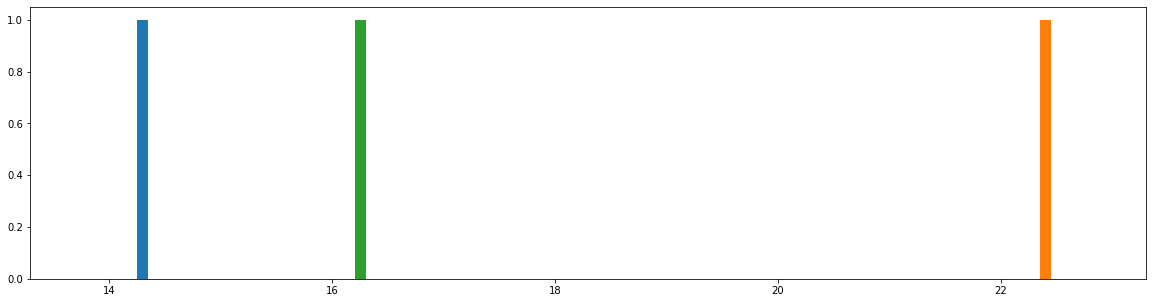

In [ ]:
model1 = sum(ree1['intraday'])/len(ree1['intraday'])
model2 = sum(ree2['intraday and intraweek'])/len(ree2['intraday and intraweek'])
model3 = sum(ree3['intraweek and intramonth'])/len(ree3['intraweek and intramonth'])
import numpy as np
import matplotlib.pyplot as plt

plt.hist(model1)
plt.hist(model2)
plt.hist(model3)
plt.show()

Text(0.5, 1.0, 'different sample sizes')

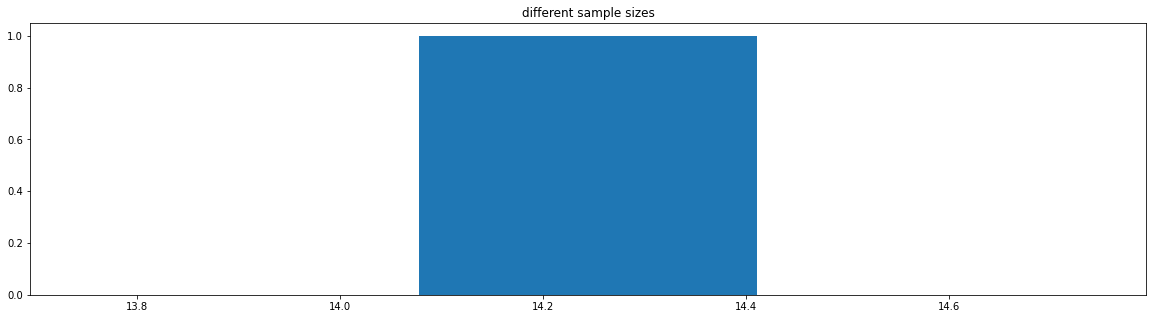

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 3

colors = ['red', 'tan', 'lime']
x_multi = [model1]
plt.hist(x_multi, n_bins, histtype='bar')
plt.title('different sample sizes')

In [ ]:
actual = outsample
onestepahead = mape['load_w']
kstepahead = mape['load_dwq']
onestepaheadmape = ree1
kstepaheadmape = ree4